# Problem sheet 3
The previous exercises gave an introduction to Python, Numpy and Pandas. Beginning with this exercise, we shift our focus to statistical learning itself. To this end, we will employ the module scikit-learn which offers many functions we will cover over the remaining semester.

If not already done, please download the file [Advertising.csv](https://www.tu-chemnitz.de/mathematik/numa/lehre/ds-2018/exercises/Advertising.csv) and move it into a subfolder called `datasets`.

## Exercise 1:
We start this exercise with the Advertising dataset known from the lecture.

We read the dataset using Pandas:

In [5]:
import pandas as pd
import numpy as np
%matplotlib inline

adv = pd.read_csv('./datasets/Advertising.csv', index_col=0)

# Print first entries of adv
print(adv.head(3))

      TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3


For convenience, we extract the values from this pandas-DataFrame

In [6]:
X = adv.values[:,0:3]
tv, radio, newspaper = np.hsplit(X,3)
Y = adv.values[:,3]

### Part (a)
Compute for each of the 3 predictor variables **TV**, **radio** and **newspaper** simple (1-dimensional) linear regressions, e.g.

$$ y^{TV}_i \approx \beta_0^{TV} + \beta_1^{TV} \, x_i^{TV}$$

Use the following function:

    from sklearn.linear_model import LinearRegression
    
You can use a command similar to

    print('y = %5.4f + %5.4f x TV' % (intercept, lincoef))
    
to print your results in a nice fashion.

In [7]:
from sklearn.linear_model import LinearRegression

reg_tv = LinearRegression().fit(tv, Y)
print('y = %5.4f + %5.4f x TV' % (reg_tv.intercept_, reg_tv.coef_[0]))

y = 7.0326 + 0.0475 x TV


In [8]:
reg_radio = LinearRegression().fit(radio, Y)
print('y = %5.4f + %5.4f x radio' % (reg_radio.intercept_, reg_radio.coef_[0]))

y = 9.3116 + 0.2025 x radio


In [9]:
reg_newspaper = LinearRegression().fit(newspaper, Y)
print('y = %5.4f + %5.4f x newspaper' % (reg_newspaper.intercept_, reg_newspaper.coef_[0]))

y = 12.3514 + 0.0547 x newspaper


You should observe, that the regression coefficients for **TV** and **newspaper** are very similar.
As you already know from the lecture, it is not satisfying from a mathematical point of view to restrict our investigation to the absolute values of the coefficients.


### Part (b)

In the lecture you learned about different measures for assessing the quality of a linear fit.
In the last exercise, we already implemented a function to compute the mean squared error (MSE).

This time, we want to compare the $R^2$ scores. You can use the method `score()` of a `LinearRegression` to get the $R^2$ values.
Remember that this value is the proportion of variability in $Y$ explained using **TV**, **radio** or **newspaper** as predictor in a 1-dimensional linear regression fit.

In [10]:
print("R^2 for TV:        ", reg_tv.score(tv,Y))
print("R^2 for radio:     ", reg_radio.score(radio,Y))
print("R^2 for newspaper: ", reg_newspaper.score(newspaper,Y))


R^2 for TV:         0.611875050850071
R^2 for radio:      0.33203245544529525
R^2 for newspaper:  0.05212044544430516


### Part (c)
Now we want to compute the predicted value of sales if we restrict our prediction to one input, i.e. **TV**, **radio** or **newspaper**, resp.
Predict the values $\hat{y}^{TV}$ $\hat{y}^{radio}$ and $\hat{y}^{newspaper}$ using the method `predict()`

In [11]:
y_tv = reg_tv.predict(tv)
y_radio = reg_radio.predict(radio)
y_newspaper = reg_newspaper.predict(newspaper)

### Part (d)

Plot the datapoints as well as the corresponding regression line for each of the inputs  **TV**, **radio** or **newspaper**.

You can use the functions `subplots` or `fig.add_subplot` to arrange the plots in one figure.

<IPython.core.display.Javascript object>


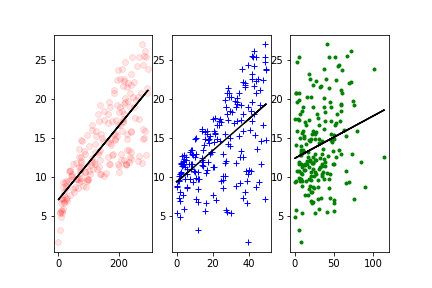

In [12]:
# We plot our findings using subplots
import matplotlib.pyplot as plt
%matplotlib notebook
fig = plt.figure()
fig.add_subplot(1,3,1)
plt.plot(X[:,0],Y,'ro', alpha=0.1)
plt.plot(X[:,0],y_tv,'k-')

fig.add_subplot(1,3,2)
plt.plot(X[:,1],Y,'b+')
plt.plot(X[:,1],y_radio,'k-')

fig.add_subplot(1,3,3)
plt.plot(X[:,2],Y,'g.')
plt.plot(X[:,2],y_newspaper,'k-')

### Part (e)
Take a closer look at the correlation matrix.
You can use the method `corr()` that is implemented for pandas `DataFrames`.
Which features are correlated most strongly?

In [13]:
# We first take a look at the correlation matrix
adv.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


**Answer**: The correlation matrix indicates, that the features **newspaper** and **radio** are correlated with a coefficient of about $0.35$.

### Part (f)
Investigate the statistical significance of the medium **newspaper** in a linear regression involving only this feature. Use a **t-test** for this purpose as described on slide 80 in the lecture notes.

You should observe the following values:

|Coefficient | Estimate | SE | t-statistic | p-value|
|:-----------|----------|----|-------------|--------|
| $\beta_0$  | 12.351 | 0.621 | 19.88 | < 0.0001 |
| $\beta_{newspaper}$ | 0.055 | 0.017 | 3.30 | 0.00115


You should use `scipy` to get the $t$-distribution using

    from scipy.stats import t
    
The cumulative distribution function at a point `x` for `n` degrees of freedom can than be called by

    t.cdf(x, n)

In [14]:
# We already computed the coefficients
reg_inv = reg_newspaper
y = y_newspaper
x = newspaper

beta_0 = reg_inv.intercept_
beta_1 = reg_inv.coef_[0]

# Get number of samples
n,p = X.shape

# Estimate the variance of data X_i
RSS = np.power(y-Y,2).sum()
RSE = np.sqrt(RSS/(n-2))

# Compute the standard error for the regression coefficients
x_mean = np.mean(x)

SE0 = np.sqrt( RSE**2 * (1./n + x_mean**2 / np.power(x - x_mean,2).sum() ) )
SE1 = np.sqrt( RSE**2 / np.power(x - x_mean,2).sum() )

tstat_0 = (beta_0 - 0) / SE0
tstat_1 = (beta_1 - 0) / SE1

# Import the t-distribution from scipy

from scipy.stats import t
pval_0 = 2*(1-t.cdf(tstat_0,n-2))
pval_1 = 2*(1-t.cdf(tstat_1,n-2))
# Print information
print("Intercept: %7.4f" % beta_0)
print("Lin. coef: %7.4f" % beta_1)
print("")
print("std-error Intercept: %7.4f" %  SE0)
print("std-error Lin. coef: %7.4f" % SE1)
print("")
print("t-statistic Intercept: %6.2f" % tstat_0)
print("t-statistic Lin. coef: %6.2f" % tstat_1)
print("")
print("P-value Intercept: %7.5f" % pval_0)
print("P-value Lin. coef: %7.5f" % pval_1)

Intercept: 12.3514
Lin. coef:  0.0547

std-error Intercept:  0.6214
std-error Lin. coef:  0.0166

t-statistic Intercept:  19.88
t-statistic Lin. coef:   3.30

P-value Intercept: 0.00000
P-value Lin. coef: 0.00115


In [15]:
print(RSE)
print(RSS)

5.092480366520192
5134.804544111939


### Part (g)
Now construct a linear regression on all three predictor variables, i.e.

$$y_i ≈ \beta_0 + \beta_{TV} x^{TV}_i + \beta_{radio} x^{radio}_i + \beta_{newspaper} x^{newspaper}_i$$ 

What do you observe? Compare your results with your findings from above.

In [16]:
reg_all = LinearRegression().fit(X, Y)
print('y = %5.4f + %5.4f x TV + %5.4f x radio + %5.4f x newspaper' % ((reg_all.intercept_,)+ tuple(reg_all.coef_)))

y = 2.9389 + 0.0458 x TV + 0.1885 x radio + -0.0010 x newspaper


**Answer**: The coefficient for the feature **newspaper** becomes negative, which doas not appear very sensible. 
This question can be answered by the $R^2$-score:

### Part (h)
What portion of the variance is explained by this linear regression fit?

In [17]:
# This question can be answered using by the R^2 score:
reg_all.score(X,Y)

0.8972106381789521

### Part (i)
Now perform a linear regression that incorporates only the predictors **TV** and
**radio**.
Compute also the $R^2$-value and compare it to the full multiple linear regression.

**Extra task**: Present the datapoints and the regression plane in a 3-dimensional plot.


In [18]:
reg_2 = LinearRegression().fit(X[:,[0,1]],Y)

In [19]:
reg_2.score(X[:,[0,1]], Y)

0.8971942610828956

**Answer**: The $R^2$-score for the linear regression fit incorporating **newspaper** is only marginally larger than the score using only **TV** and **radio** for the prediction.
Thus, it might be sufficient to exclude the **feature** newspaper from our prediction.
The procedure we did today is called *feature selection* is should be one of the first steps in every statistical learning problem.

# Homework:

We have already seen, that the **t-test** comes in handy when one has to decide whether a coefficient for a single feature is significant or not.
As has been outlined in the lecture, one can also use the t-test in a multiple linear regression fit

$$ Y = X \beta + \varepsilon $$

while the intercept is incorporated into $X$, i.e. a column containing only ones is stacked in front of the original matrix $X$.

The formula to compute the test statistic in this generalized setting is

$$ t_j = \frac{\hat{\beta}_j}{\hat{\sigma} \sqrt{v_j}} $$

while $\hat \beta_j$ is the $j$-th entry of the coefficient vector

$$ \hat \beta = (X^\top X)^{-1} X^\top y, $$

$\hat{\sigma}$ is the unbiased estimate of $\sigma$, which is determined by

$$ \hat{\sigma} = \sqrt{\frac{1}{n-p-1} \, \sum_{i=1}^n (y_i - \hat{y}_i)^2} $$

and $v_j$ is the $j$-th diagonal element of the matrix $(X^\top X)^{-1}$.

Then $t_j$ is distributed according to a $t$-distribution with $n-p-1$ degrees of freedom (dofs). 

**Task**: Compute the values in the following statistic and try to print it in a similar way. 

|  Coefficient     | Estimate  | SE    | t-statistic | p-value |
|:-----------------|-----------|-------|-------------|---------|
| $\beta_0$        | 2.939     |0.3119 | 9.42        | < 0.0001|
| $\beta_{TV}$     | 0.046     |0.0014 | 32.81       | < 0.0001|
| $\beta_{radio}$  | 0.189     |0.0086 | 21.89       | < 0.0001|
| $\beta_{news}$   | −0.001    |0.0059 | −0.18       | 0.8599  |



In [32]:
# Stack one column containing only ones in front of X
myX = np.hstack((np.ones((n,1)),X))

# Invert X^T * X
V = np.linalg.inv((myX.T).dot(myX))

# Compute regression coefficients beta
beta = V.dot( myX.T.dot(Y) )

# Extract diagonal out of matrix (X^T * X)^-1
v = V.diagonal()

# Predict y using beta
y_pred = myX.dot(beta)

# Compute estimate of sigma
sigma_hat = np.sqrt( 1./(n-p-1) * np.power(Y - y_pred,2).sum() )

# Compute the standard errors
SE = np.sqrt(v) * sigma_hat

# Compute the values of the t-statistic
t_vals = beta / SE

# Compute the corresponding p values
p_vals = 2*t.cdf(-np.absolute(t_vals), n-p-1)

# Print header
print('|  Coefficient | Estimate |    SE    | t-statistic |  p-value  |')
print('---------------------------------------------------------------')

pval_str = []
# Print
for i in range(p+1):
    pval = p_vals[i]
    if pval < 0.0001:
        pval_str.append('< 0.0001')
    else:
        pval_str.append('  %5.4f' % pval)
    print('|    beta_%i    |  %6.3f  |  %6.4f  |    %5.2f    | %s  |' % (i, beta[i], SE[i], t_vals[i], pval_str[i]))

|  Coefficient | Estimate |    SE    | t-statistic |  p-value  |
---------------------------------------------------------------
|    beta_0    |   2.939  |  0.3119  |     9.42    | < 0.0001  |
|    beta_1    |   0.046  |  0.0014  |    32.81    | < 0.0001  |
|    beta_2    |   0.189  |  0.0086  |    21.89    | < 0.0001  |
|    beta_3    |  -0.001  |  0.0059  |    -0.18    |   0.8599  |


Another way to give present this in a nice way is by using pandas data frames:

In [33]:
import pandas as pd
import numpy as np

In [36]:
df = pd.DataFrame(index=['Intercept', 'TV', 'radio', 'newspaper'])
df['beta']   = beta
df['SE']     = SE
df['t_vals'] = t_vals
df['p_vals'] = pval_str

In [35]:
df

,beta,SE,t_vals,p_vals
Intercept,2.938889,0.311908,9.422288,< 0.0001
TV,0.045765,0.001395,32.808624,< 0.0001
radio,0.188530,0.008611,21.893496,< 0.0001
newspaper,-0.001037,0.005871,-0.176715,0.8599
